In [1]:
!pip install git+https://github.com/openai/whisper.git
!pip install jiwer


  Cloning https://github.com/openai/whisper.git to c:\users\tejas\appdata\local\temp\pip-req-build-anlq6_8h
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git 'C:\Users\tejas\AppData\Local\Temp\pip-req-build-anlq6_8h'

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import random
from models.asr_model import HindiASRModel
from utils.metrics import compute_metrics
from utils.inference import infer_and_display

In [3]:

# # Cell 3: Initialize ASR model
# asr = HindiASRModel(model_size="small")

# # Cell 4: Transcribe a test file
# # Place .wav files in the `audio/` folder.
# audio_file = "audio/test1.wav"
# prediction = asr.transcribe(audio_file)
# print("Prediction:", prediction)

# # Cell 5: Evaluate on a small dataset
# test_files = {
#     "audio/test1.wav": "भारत एक महान देश है",
#     "audio/test2.wav": "मौसम आज बहुत अच्छा है",
# }

# preds, refs = [], []
# for path, ref in test_files.items():
#     pred = asr.transcribe(path)
#     preds.append(pred)
#     refs.append(ref)
#     print(f"\nFile: {path}")
#     print("Prediction:", pred)
#     print("Reference :", ref)

# metrics = compute_metrics(preds, refs)
# print("\n📊 Evaluation Metrics:")
# for k, v in metrics.items():
#     print(f"{k}: {v}%")

# # Cell 6: Inference function usage
# # This can be used interactively
# infer_and_display(asr, "audio/test1.wav")


In [9]:
asr = HindiASRModel(model_size="medium")

In [10]:
# Load test data and choose fraction
def load_transcriptions(transcription_file: str, fraction: float = 1.0):
    with open(transcription_file, "r", encoding="utf-8") as f:
        lines = f.readlines()

    data = []
    for line in lines:
        if line.strip():
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                file_id, transcription = parts
                audio_path = os.path.join("test/audio", f"{file_id}.wav")
                if os.path.exists(audio_path):
                    data.append((audio_path, transcription))

    random.shuffle(data)
    num_samples = int(len(data) * fraction)
    return data[:num_samples], len(data)


In [11]:
# Evaluate model on custom dataset
fraction_to_use = 0.01
transcription_file = "./test/transcription.txt"
samples, total_num_samples = load_transcriptions(transcription_file, fraction=fraction_to_use)

preds, refs = [], []
for audio_path, true_transcription in samples:
    pred = asr.transcribe(audio_path)
    preds.append(pred)
    refs.append(true_transcription)

    print(f"\nFile: {os.path.basename(audio_path)}")
    print("Prediction:", pred)
    print("Reference :", true_transcription)



File: 4782_029.wav
Prediction:  उनोनी सारी भईयों को समेट कर एक गथर बनाया और
Reference : उन्होंनें सारी बहियों को समेट कर एक गट्ठर बनाया और

File: 1155_028.wav
Prediction:  अपनों के पत्ते कुछ उड़गए तुफान में बिना परो के आसमान दे गया मुझे जाए।
Reference : सपनों के पत्ते कुछ उड़ गए तूफ़ान में बिना परों के आसमान दे गया मुझे

File: 1536_087.wav
Prediction:  अध्या जिछिल्ला हैं जिल्ली करो जिसा मेंने का वैसा करों
Reference : दादाजी चिल्लाए जल्दी करो जैसा मैंने कहा वैसा करो

File: 0879_003.wav
Prediction:  ताकि भगवान का दिया तोपा परसा जल सही तरीके से अमारे काम आ सके।
Reference : ताकि भगवान का दिया तोहफा वर्षा जल सही तरीके से हमारे काम आ सके

File: 0308_025.wav
Prediction:  तनी कह रही तीट की बरब से दके होई पेड पोड़े बढे ही सुन्दर दिखते हैं।
Reference : रजनी कह रही थी कि बर्फ़ से ढके हुए पेड़पौधे बड़े ही सुन्दर दिखते हैं

File: 4792_088.wav
Prediction:  जिस परे कलुशिक्त हर्दियों में कहीं कहीं धर्म का दुन्ला बकाज रहता है
Reference : जिस तरह कलुषित हृदयों में कहींकहीं धर्म का धुँधला प्रकाश रहता है

Fil

In [12]:
# Cell 6: Compute Evaluation Metrics
from utils.metric import compute_metrics

print("Example Prediction:", preds[0])
print("Example Reference:", refs[0])
print("Total Samples:", len(preds))

metrics = compute_metrics(preds, refs)
print("\nEvaluation Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v}")

Example Prediction:  उनोनी सारी भईयों को समेट कर एक गथर बनाया और
Example Reference: उन्होंनें सारी बहियों को समेट कर एक गट्ठर बनाया और
Total Samples: 38

Evaluation Metrics:
WER: 93.81
CER: 20.47
Samples Used: 38


In [7]:
import os
import sys

# Replace this with the actual path to your ffmpeg/bin folder
ffmpeg_path = r"C:\ffmpeg\bin"

# Add to PATH for the current session
os.environ["PATH"] += os.pathsep + ffmpeg_path

# Confirm it's available
!ffmpeg -version


ffmpeg version 7.1.1-full_build-www.gyan.dev Copyright (c) 2000-2025 the FFmpeg developers
built with gcc 14.2.0 (Rev1, Built by MSYS2 project)
configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-lcms2 --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-libdvdnav --enable-libdvdread --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libopenjpeg --enable-libquirc --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-libqrencode --enable-librav1e --enable-libsvtav1 --enable-libvvenc --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve --enable-libxvid --enable-libaom --enable-libjxl --enable-libvpx --enable-mediafoundatio

In [27]:
!pip install python-Levenshtein


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


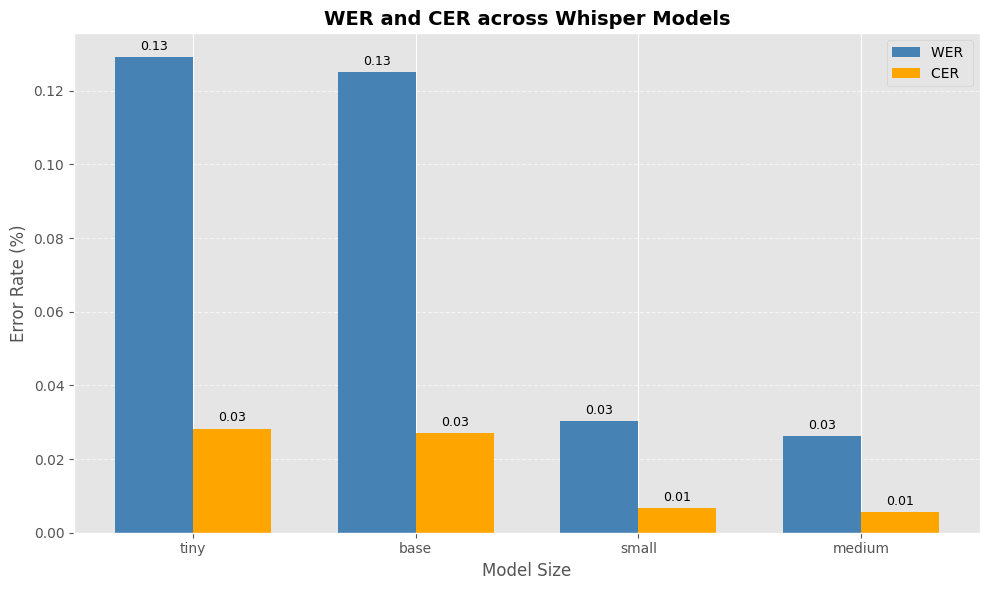

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# plt.style.use('ggplot')

# # Data
# model_size = ['tiny', 'base', 'small', 'medium']
# wers = [496.25/3843, 480.7/3843, 116.37/3843, 100.98/3843]
# cers = [108.65/3843, 103.71/3843, 25.61/3843, 21.12/3843]

# # Bar chart parameters
# x = np.arange(len(model_size))
# width = 0.35  # width of the bars

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# bars1 = ax.bar(x - width/2, wers, width, label='WER ', color='steelblue')
# bars2 = ax.bar(x + width/2, cers, width, label='CER ', color='orange')

# # Labels and Titles
# ax.set_xlabel('Model Size', fontsize=12)
# ax.set_ylabel('Error Rate (%)', fontsize=12)
# ax.set_title('WER and CER across Whisper Models', fontsize=14, weight='bold')
# ax.set_xticks(x)
# ax.set_xticklabels(model_size)
# ax.legend()

# # Display values on top of bars
# for bar in bars1 + bars2:
#     height = bar.get_height()
#     ax.annotate(f'{height:.2f}',
#                 xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),  # offset
#                 textcoords="offset points",
#                 ha='center', va='bottom', fontsize=9)

# plt.tight_layout()
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.show()


WER = Substitutions + Insertions + Deletions) / Total Words in Reference

CER = (Substitutions + Insertions + Deletions) / Total Characters in Reference.
